# load data & library 

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
train = pd.read_csv('./data/FIFA_train.csv')
print(train.shape)
train.head()

(8932, 12)


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [90]:
test = pd.read_csv('./data/FIFA_test.csv')
print(test.shape)
test.head()

(3828, 11)


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


# 데이터 살펴보기 

## 데이터 타입

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


## 데이터 분포

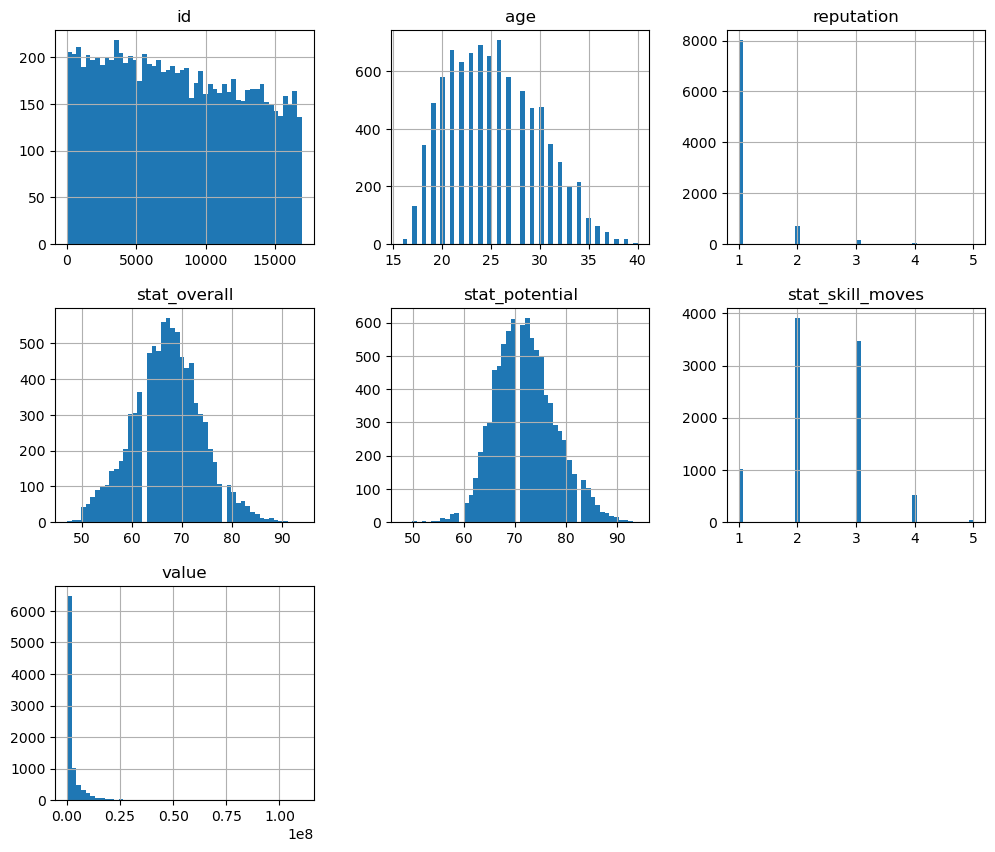

In [93]:
train.hist(figsize=(12, 10), bins=50);

## 결측치 조회

In [94]:
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [95]:
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

## 포지션이 이적료에 영향을 미친다는 증거

In [96]:
train.groupby("position")['value'].mean().sort_values(ascending=False)

position
ST    3.330361e+06
MF    3.121762e+06
DF    2.304348e+06
GK    1.992073e+06
Name: value, dtype: float64

# 파생변수

## stats
* stat_overall : 선수의 현재 능력치
* stat_potential : 선수의 경험 및 노력을 통해 발전할 수 있는 정도
* stat = stat_overall + stat_potential

In [97]:
train["stats"] = train["stat_overall"] + train["stat_potential"]
test["stats"] = test["stat_overall"] + test["stat_potential"]

## contract_year
* 일반적으로 계약기간이 길수록 높은 이적료
* 현재 연도를 임의로 2018년으로 하고 남은 계약기간 설정 
* 2018이 연도 중 최솟값이기 때문에 2018로 설정

In [98]:
train["contract_until"].unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', 'Jun 30, 2019',
       '2026', 'Dec 31, 2018', '2018', '2025', 'Jun 30, 2020',
       'May 31, 2020', 'May 31, 2019', 'Jan 31, 2019', 'Jan 1, 2019',
       'Jan 12, 2019'], dtype=object)

In [99]:
test["contract_until"].unique()

array(['2022', '2023', '2020', '2021', 'Jun 30, 2019', '2019', '2025',
       '2024', '2018', 'May 31, 2020', 'Jun 30, 2020', 'May 31, 2019',
       'Dec 31, 2019', 'Dec 31, 2018', 'Jun 1, 2019', 'Jan 1, 2019',
       'Jan 31, 2019', '2026'], dtype=object)

In [100]:
train["contract_until"] = pd.to_datetime(train["contract_until"])
test["contract_until"] = pd.to_datetime(test["contract_until"])

In [101]:
train["contract_year"] = train["contract_until"].dt.year
test["contract_year"] = test["contract_until"].dt.year

In [102]:
train[["contract_until", "contract_year"]].sample(5)

,contract_until,contract_year
2483,2022-01-01,2022
461,2022-01-01,2022
5324,2019-06-30,2019
60,2020-01-01,2020
248,2019-01-01,2019


In [103]:
train["contract_year"] -= 2018 
test["contract_year"] -= 2018

In [104]:
train[["contract_until", "contract_year"]].sample(5)

,contract_until,contract_year
3436,2022-01-01,4
3958,2019-01-01,1
4944,2019-06-30,1
8697,2020-01-01,2
5695,2021-01-01,3


# feature & label 

In [105]:
label = "value"

In [106]:
feature_names = train.columns.tolist()
feature_names

['id',
 'name',
 'age',
 'continent',
 'contract_until',
 'position',
 'prefer_foot',
 'reputation',
 'stat_overall',
 'stat_potential',
 'stat_skill_moves',
 'value',
 'stats',
 'contract_year']

In [107]:
feature_names = ['age', 'position', 'reputation', 'stats', 'contract_year']
feature_names

['age', 'position', 'reputation', 'stats', 'contract_year']

# train & test

In [108]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(8932, 5)


,age,position,reputation,stats,contract_year
0,31,ST,5.0,188,3
1,27,GK,4.0,184,2
2,31,ST,5.0,182,3
3,32,DF,4.0,182,2
4,25,GK,3.0,183,3


In [109]:
y_train = train[label]
print(y_train.shape)
y_train.head()

(8932,)


0    110500000.0
1     72000000.0
2     80000000.0
3     51000000.0
4     68000000.0
Name: value, dtype: float64

In [110]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(3828, 5)


,age,position,reputation,stats,contract_year
0,33,ST,5.0,188,4
1,26,ST,5.0,185,4
2,27,MF,4.0,183,5
3,27,ST,4.0,182,2
4,32,MF,4.0,182,2


# 머신러닝
* 포지션 데이터 타입에 대한 에러
* get_dummies를 활용하여 One-Hot-Encoding

In [111]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [112]:
X_train = pd.get_dummies(data=X_train, columns=["position"], prefix="position")
X_train

,age,reputation,stats,contract_year,position_DF,position_GK,position_MF,position_ST
0,31,5.0,188,3,0,0,0,1
1,27,4.0,184,2,0,1,0,0
2,31,5.0,182,3,0,0,0,1
3,32,4.0,182,2,1,0,0,0
4,25,3.0,183,3,0,1,0,0
...,...,...,...,...,...,...,...,...
8927,18,1.0,111,1,0,0,1,0
8928,19,1.0,106,2,1,0,0,0
8929,18,1.0,111,3,1,0,0,0
8930,18,1.0,112,3,0,1,0,0


In [126]:
X_test = pd.get_dummies(data=X_test, columns=["position"], prefix="position")
X_test

,age,reputation,stats,contract_year,position_DF,position_GK,position_MF,position_ST
0,33,5.0,188,4,0,0,0,1
1,26,5.0,185,4,0,0,0,1
2,27,4.0,183,5,0,0,1,0
3,27,4.0,182,2,0,0,0,1
4,32,4.0,182,2,0,0,1,0
...,...,...,...,...,...,...,...,...
3823,20,1.0,111,3,0,0,1,0
3824,18,1.0,113,0,0,1,0,0
3825,18,1.0,113,3,0,0,1,0
3826,18,1.0,108,2,0,0,0,1


In [127]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [128]:
y_predict = model.predict(X_test)
y_predict

array([8.8880e+07, 7.3290e+07, 6.7445e+07, ..., 6.2550e+04, 4.6700e+04,
       4.4700e+04])

<AxesSubplot:>

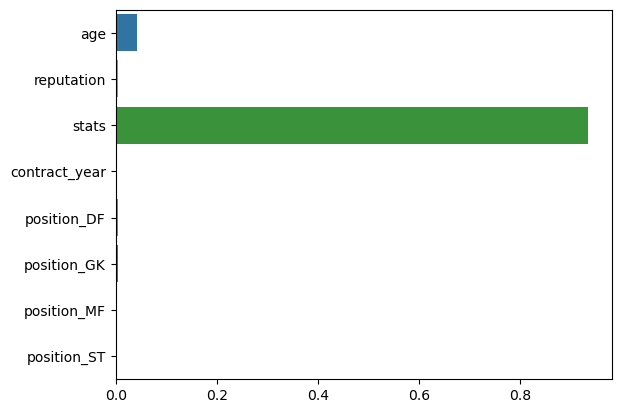

In [82]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

# ML : cross validate

In [83]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


array([6218000., 5778000., 6218000., 5890000., 5843000.])

## 점수를 보고 놀랐으나 바로 회귀이니 당연 

In [85]:
valid_accuracy = (y_train == y_valid_predict).mean()
valid_accuracy

0.0016793551276309898

<AxesSubplot:xlabel='value'>

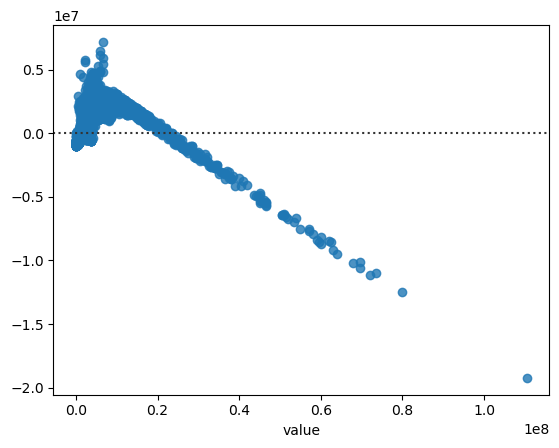

In [115]:
sns.residplot(x=y_train, y=y_valid_predict)

## 그래도 낮다 

In [116]:
from sklearn.metrics import r2_score

r2_score(y_train, y_valid_predict)

0.3086937829110309

/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy versio

# 파일 제출 

In [134]:
submit = pd.read_csv("data/submission.csv")
submit.head()

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0


In [135]:
submit["value"] = y_predict
submit.head()

,id,value
0,1,88880000.0
1,2,73290000.0
2,4,67445000.0
3,5,69975000.0
4,6,61245000.0


In [136]:
submit.to_csv("submit1.csv", index=False)

In [138]:
pd.read_csv("submit1.csv").head()

,id,value
0,1,88880000.0
1,2,73290000.0
2,4,67445000.0
3,5,69975000.0
4,6,61245000.0
